### Load packages

In [2]:
library(syuzhet)
library(readr)
library(stringr)
library(dplyr)
require(tidytext)
require(tm)
library(topicmodels)
require(quanteda)
require(readtext)
library(wordcloud)
require(ggplot2)

Loading required package: quanteda
quanteda version 1.0.0
Using 3 of 4 threads for parallel computing

Attaching package: 'quanteda'

The following objects are masked from 'package:tm':

    as.DocumentTermMatrix, stopwords

The following object is masked from 'jupyter:irkernel':

    View

The following object is masked from 'package:utils':

    View

Loading required package: readtext
Loading required package: RColorBrewer
Loading required package: ggplot2

Attaching package: 'ggplot2'

The following object is masked from 'package:NLP':

    annotate



### Find text and create corpus

In [3]:
cname <- file.path("usa-central-bank", "fomc-statements")   

text <- VCorpus(DirSource(cname))
cb_corpus <- corpus(text)
summary(cb_corpus, 5)

,Text,Types,Tokens,Sentences,datetimestamp,id,language
2014-01-29.txt,2014-01-29.txt,346,916,32,2018-02-06 00:18:16,2014-01-29.txt,en
2014-03-19.txt,2014-03-19.txt,371,975,35,2018-02-06 00:18:16,2014-03-19.txt,en
2014-04-30.txt,2014-04-30.txt,350,903,33,2018-02-06 00:18:16,2014-04-30.txt,en
2014-06-18.txt,2014-06-18.txt,343,889,32,2018-02-06 00:18:16,2014-06-18.txt,en
2014-07-30.txt,2014-07-30.txt,348,933,33,2018-02-06 00:18:16,2014-07-30.txt,en


### Create tokens

In [9]:
toks <- tokens(cb_corpus)

###  Remove punctuation, text into Document Term Matrix and then into Tidy Text

In [12]:
text <- tm_map(text, removePunctuation)
cb_text <- DocumentTermMatrix(text)
cb_text <- tidy(cb_text)

In [15]:
cb_topics <- tidy(cb_lda, matrix="beta")
cb_topics

topic,term,beta
1,114,2.301415e-04
2,114,1.339657e-04
1,12month,4.418968e-04
2,12month,4.461256e-04
1,2017,1.301209e-04
2,2017,1.220377e-04
1,612,1.534093e-04
2,612,2.417126e-04
1,about,4.330789e-04
2,about,3.061312e-04


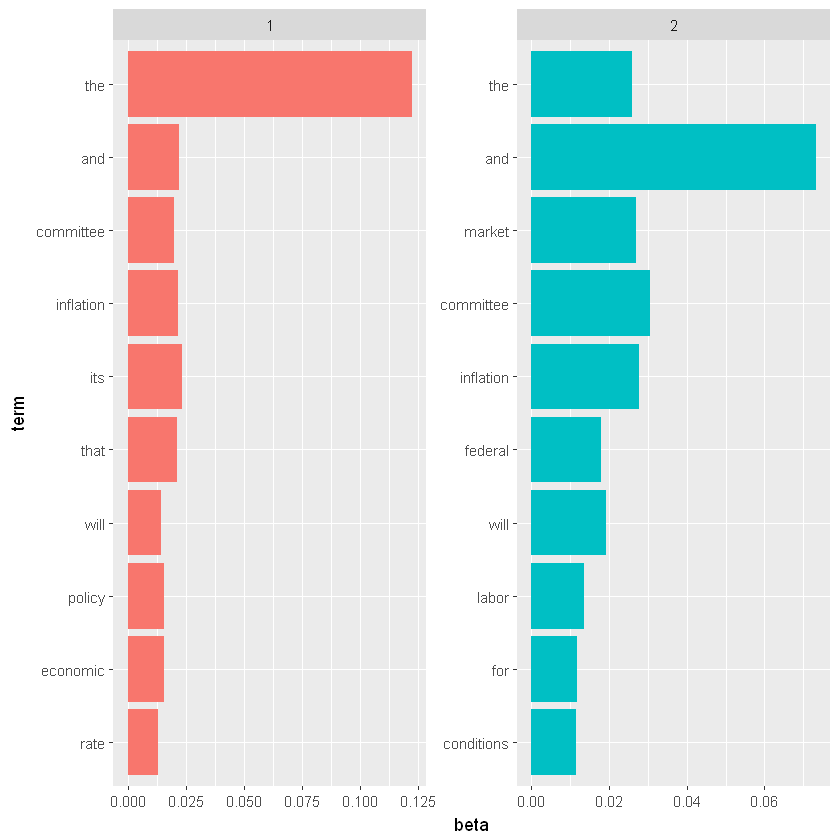

In [16]:
cb_top_terms <- cb_topics %>%
    group_by(topic) %>%
    top_n(10, beta) %>%
    ungroup() %>%
    arrange(topic, -beta)

cb_top_terms %>%
mutate(term = reorder(term, beta)) %>%
  ggplot(aes(term, beta, fill = factor(topic))) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~ topic, scales = "free") +
  coord_flip()

In [8]:
cb_text  %>%
    unnest_tokens(word, term)


document,count,word
2014-01-29.txt,2,612
2014-01-29.txt,1,about
2014-01-29.txt,2,above
2014-01-29.txt,2,accommodation
2014-01-29.txt,3,accommodative
2014-01-29.txt,1,account
2014-01-29.txt,1,action
2014-01-29.txt,3,activity
2014-01-29.txt,2,add
2014-01-29.txt,1,additional


In [9]:
cb_text <- cb_text %>%
    anti_join(stop_words, by = c("term" = "word"))    
cb_text

document,term,count
2014-01-29.txt,612,2
2014-01-29.txt,accommodation,2
2014-01-29.txt,accommodative,3
2014-01-29.txt,account,1
2014-01-29.txt,action,1
2014-01-29.txt,activity,3
2014-01-29.txt,add,2
2014-01-29.txt,additional,1
2014-01-29.txt,advanced,1
2014-01-29.txt,agency,5


In [12]:
cb_sentiments <-cb_text %>%
    inner_join(get_sentiments("bing"), by = c(term = "word")) %>%
    count(sentiment, sort = TRUE)

cb_sentiments

sentiment,n
positive,365
negative,148


In [8]:
cb_text %>%
    anti_join(stop_words) %>%
    count(term) %>%
    with()

term,n
accommodative,30
account,30
action,30
activity,30
assessment,30
business,30
chairman,30
committee,30
conditions,30
consistent,30


In [12]:
cb_tf_idf <- cb_text %>%
    bind_tf_idf(term, document, count) %>%
    arrange(desc(tf_idf))
cb_tf_idf

document,term,count,tf,idf,tf_idf
2015-01-28.txt,committeeâ€™s,3,0.009009009,3.401197,0.03064142
2017-09-20.txt,hurricanes,2,0.006600660,3.401197,0.02245015
2014-06-18.txt,purchases,5,0.011415525,1.609438,0.01837258
2014-04-30.txt,purchases,5,0.011363636,1.609438,0.01828907
2014-01-29.txt,purchases,5,0.011235955,1.609438,0.01808357
2014-07-30.txt,purchases,5,0.010940919,1.609438,0.01760873
2014-07-30.txt,asset,6,0.013129103,1.321756,0.01735347
2014-03-19.txt,purchases,5,0.010460251,1.609438,0.01683512
2014-09-17.txt,purchases,5,0.010288066,1.609438,0.01655800
2014-09-17.txt,asset,6,0.012345679,1.321756,0.01631797


In [28]:
text <- c("The Official Cash Rate (OCR) will remain unchanged at 7.25 percent.-",
"Reserve Bank Governor Alan Bollard said: The economy has continued to slow in recent months, broadly in line with the outlook contained in our December Monetary Policy Statement.-", 
"GDP growth slowed in the third quarter of 2005, due to kthe impact of the high exchange rate on the export and import-competing sectors, and a fall in construction.-",
"Looking to 2006, while there are some early indications, we are yet to see hard evidence of a sustained slowdown in domestic demand.")



In [29]:
# puts text into data frame
text_df <- data_frame(line=1:4, text = text)
text_df

line,text
1,The Official Cash Rate (OCR) will remain unchanged at 7.25 percent.-
2,"Reserve Bank Governor Alan Bollard said: The economy has continued to slow in recent months, broadly in line with the outlook contained in our December Monetary Policy Statement.-"
3,"GDP growth slowed in the third quarter of 2005, due to kthe impact of the high exchange rate on the export and import-competing sectors, and a fall in construction.-"
4,"Looking to 2006, while there are some early indications, we are yet to see hard evidence of a sustained slowdown in domestic demand."


In [30]:
# turns text into individual tokens
tidy_text <- text_df %>%
    unnest_tokens(word, text)

tidy_text

line,word
1,the
1,official
1,cash
1,rate
1,ocr
1,will
1,remain
1,unchanged
1,at
1,7.25


In [31]:
data(stop_words)

In [32]:
tidy_text <- tidy_text %>%
    anti_join(stop_words)

Joining, by = "word"


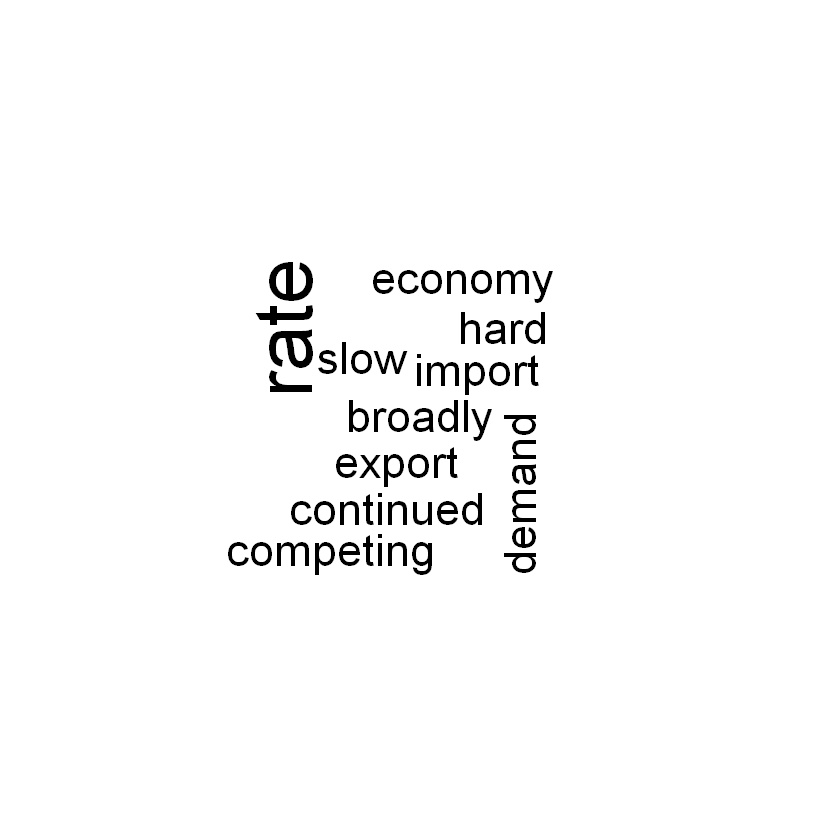

In [34]:
tidy_text %>%
    count(word, sort=TRUE) %>%
    with(wordcloud(word, n, max.words=10))
    

In [36]:
nrc <- get_nrc_sentiment("The Official Cash Rate (OCR) will remain unchanged at 7.25 percent.

Reserve Bank Governor Alan Bollard said: The economy has continued to slow in recent months, broadly in line with the outlook contained in our December Monetary Policy Statement. 
GDP growth slowed in the third quarter of 2005, due to the impact of the high exchange rate on the export and import-competing sectors, and a fall in construction. 
Looking to 2006, while there are some early indications, we are yet to see hard evidence of a sustained slowdown in domestic demand. 
To date, strong domestic demand has been fuelled by strong employment, wage growth, rising house prices, and growth in Government spending. 
Overall, total spending continues to outstrip growth in production, contributing to an unsustainably large current account deficit.

Over recent years, considerable pressures have built up on resources, leading to the current high level of inflation. 
While capacity and resource constraints appear now to be easing, inflation pressures remain of concern. 
Annual CPI inflation stands at 3.2 percent, and our forecasts point to inflation remaining toward the upper end of the target band over the next couple of years. 
Continuing increases in wages, energy prices and other business costs suggest that inflation pressures will not subside quickly. 
Of particular concern, inflation expectations remain uncomfortably high.

Given this situation, we do not expect to raise the OCR further in this cycle; however, this possibility cannot be ruled out until we see clear evidence of a sustained weakening in domestic demand. 
Certainly we see no prospect of an OCR easing, given the relatively high medium-term inflation outlook. 
An early decline in interest rates, as expected by some in the financial markets, would risk reigniting spending and hence inflation pressures.")
